In [181]:
!pip install seaborn
!pip install statsmodels

# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# LogReg
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    roc_auc_score, 
    roc_curve, 
    classification_report, 
    confusion_matrix
)

In [200]:
df = pd.read_csv('loan_data.csv')

В архиве данные по банковским кредитам. Надо сделать EDA, обучить модель регрессии, провалидироваться. Изучите гиперпараметры логистической регрессии в документации sklearn, поиграйтесь с разными гиперпараметрами для получения лучшего результата. Валидируйтесь по F1, roc_auc. Заодно постройте кривую roc_auc. Так же делайте кроссвалидацию, как показывал на уроке.

| Column | Description | Type |
|--------|-------------|------|
| person_age | Age of the person | Float |
| person_gender | Gender of the person | Categorical |
| person_education | Highest education level | Categorical |
| person_income | Annual income | Float |
| person_emp_exp | Years of employment experience | Integer |
| person_home_ownership | Home ownership status (e.g., rent, own, mortgage) | Categorical |
| loan_amnt | Loan amount requested | Float |
| loan_intent | Purpose of the loan | Categorical |
| loan_int_rate | Loan interest rate | Float |
| loan_percent_income | Loan amount as a percentage of annual income | Float |
| cb_person_cred_hist_length | Length of credit history in years | Float |
| credit_score | Credit score of the person | Integer |
| previous_loan_defaults_on_file | Indicator of previous loan defaults | Categorical |
| loan_status (target variable) | Loan approval status: 1 = approved; 0 = rejected | Integer |

In [44]:
df.shape

(45000, 14)

In [45]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [46]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [47]:
df.isnull().sum() # проверка пустых значений в данных

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [48]:
df.select_dtypes(include=[np.number]).columns.tolist() # числовые значения

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'loan_status']

In [49]:
df.select_dtypes(include=['object']).columns.tolist() # категориальные

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [50]:
df.sample(5, random_state=42) # рандомная выборка для наглядности дальнейшего анализа

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
37979,32.0,male,Associate,96865.0,10,MORTGAGE,7500.0,EDUCATION,6.04,0.08,10.0,601,No,0
9911,24.0,male,Associate,56838.0,6,RENT,9000.0,EDUCATION,11.49,0.16,4.0,647,Yes,0
43386,22.0,female,Master,37298.0,0,RENT,5000.0,MEDICAL,14.88,0.13,4.0,711,No,1
13822,23.0,female,Bachelor,39944.0,1,OWN,5000.0,VENTURE,13.99,0.13,3.0,597,Yes,0
44810,42.0,male,High School,67974.0,20,MORTGAGE,10000.0,HOMEIMPROVEMENT,15.41,0.15,11.0,586,No,1


In [51]:
df.groupby(['person_age']).count()

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,,,,,,,,,,,,,
20.0,17,17,17,17,17,17,17,17,17,17,17,17,17
21.0,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289
22.0,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236
23.0,5254,5254,5254,5254,5254,5254,5254,5254,5254,5254,5254,5254,5254
24.0,5138,5138,5138,5138,5138,5138,5138,5138,5138,5138,5138,5138,5138
25.0,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507
26.0,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659
27.0,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095
28.0,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728


Возрасты 109 116 123 и 144 выглядят аномальными. Надо будет учесть при обучении.

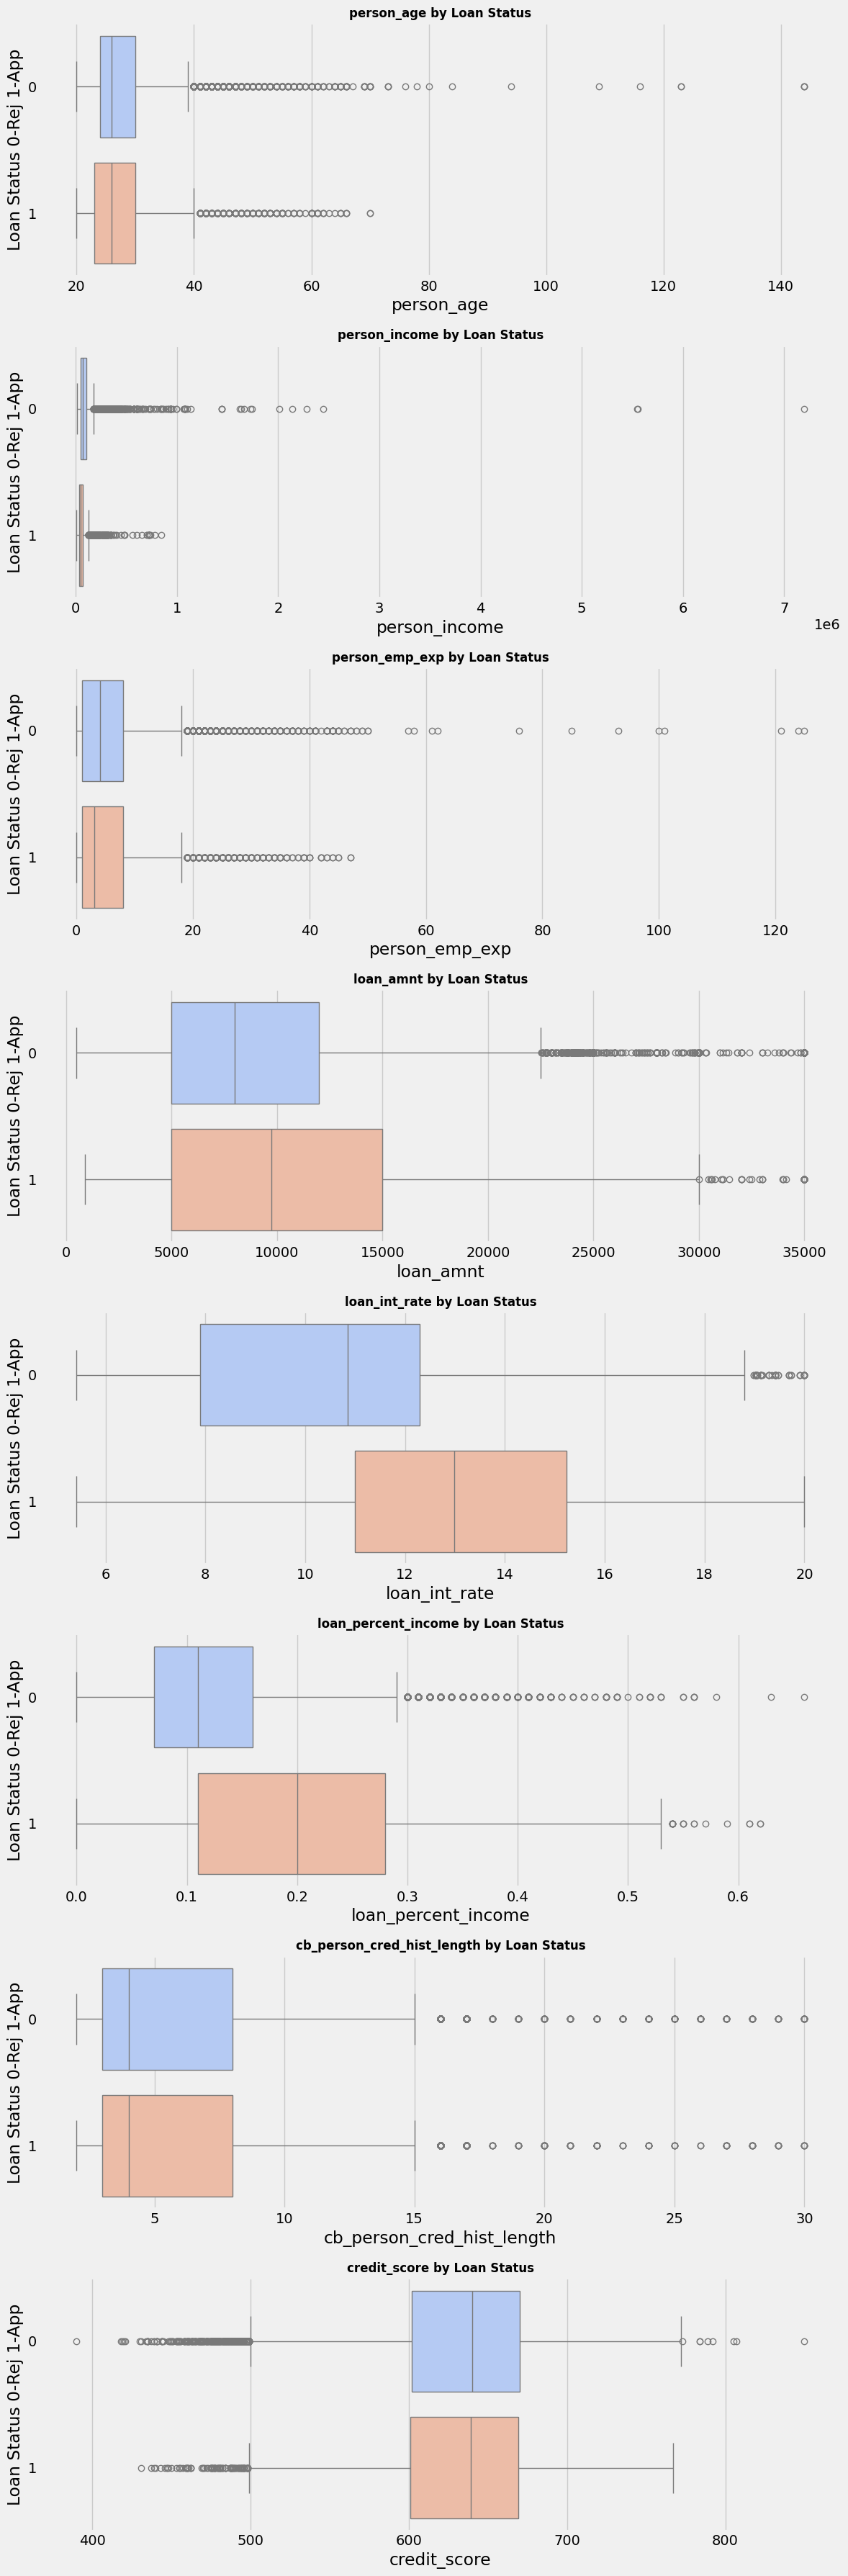

In [52]:
numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                  'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
                  'credit_score']

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 36))

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y='loan_status', x=col, ax=axes[i], palette='coolwarm', orient='h')
    axes[i].set_title(f'{col} by Loan Status', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Loan Status 0-Rej 1-App')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

Все числовые фичи имеют выбросы.

В среднем 'person age' особо не влияет, разве что, чуть выше нижний порог для решения о выдаче кредита.

БОльший верхний порог 'load_amnt' снижает вероятность выдачи кредита.

БОльший верхний порог  `load_int_rate` снижает вероятность выдачи кредита.

БОльший верхний порог  `loan_person_income` снижает вероятность выдачи кредита.

`credit_score` в среднем совпадает по `loan_status`.

Посмотрим тоже самое без выбросов.

До удаления выбросов: 45000 строк
После удаления выбросов: 18642 строк
Удалено: 26358 строк (58.57%)


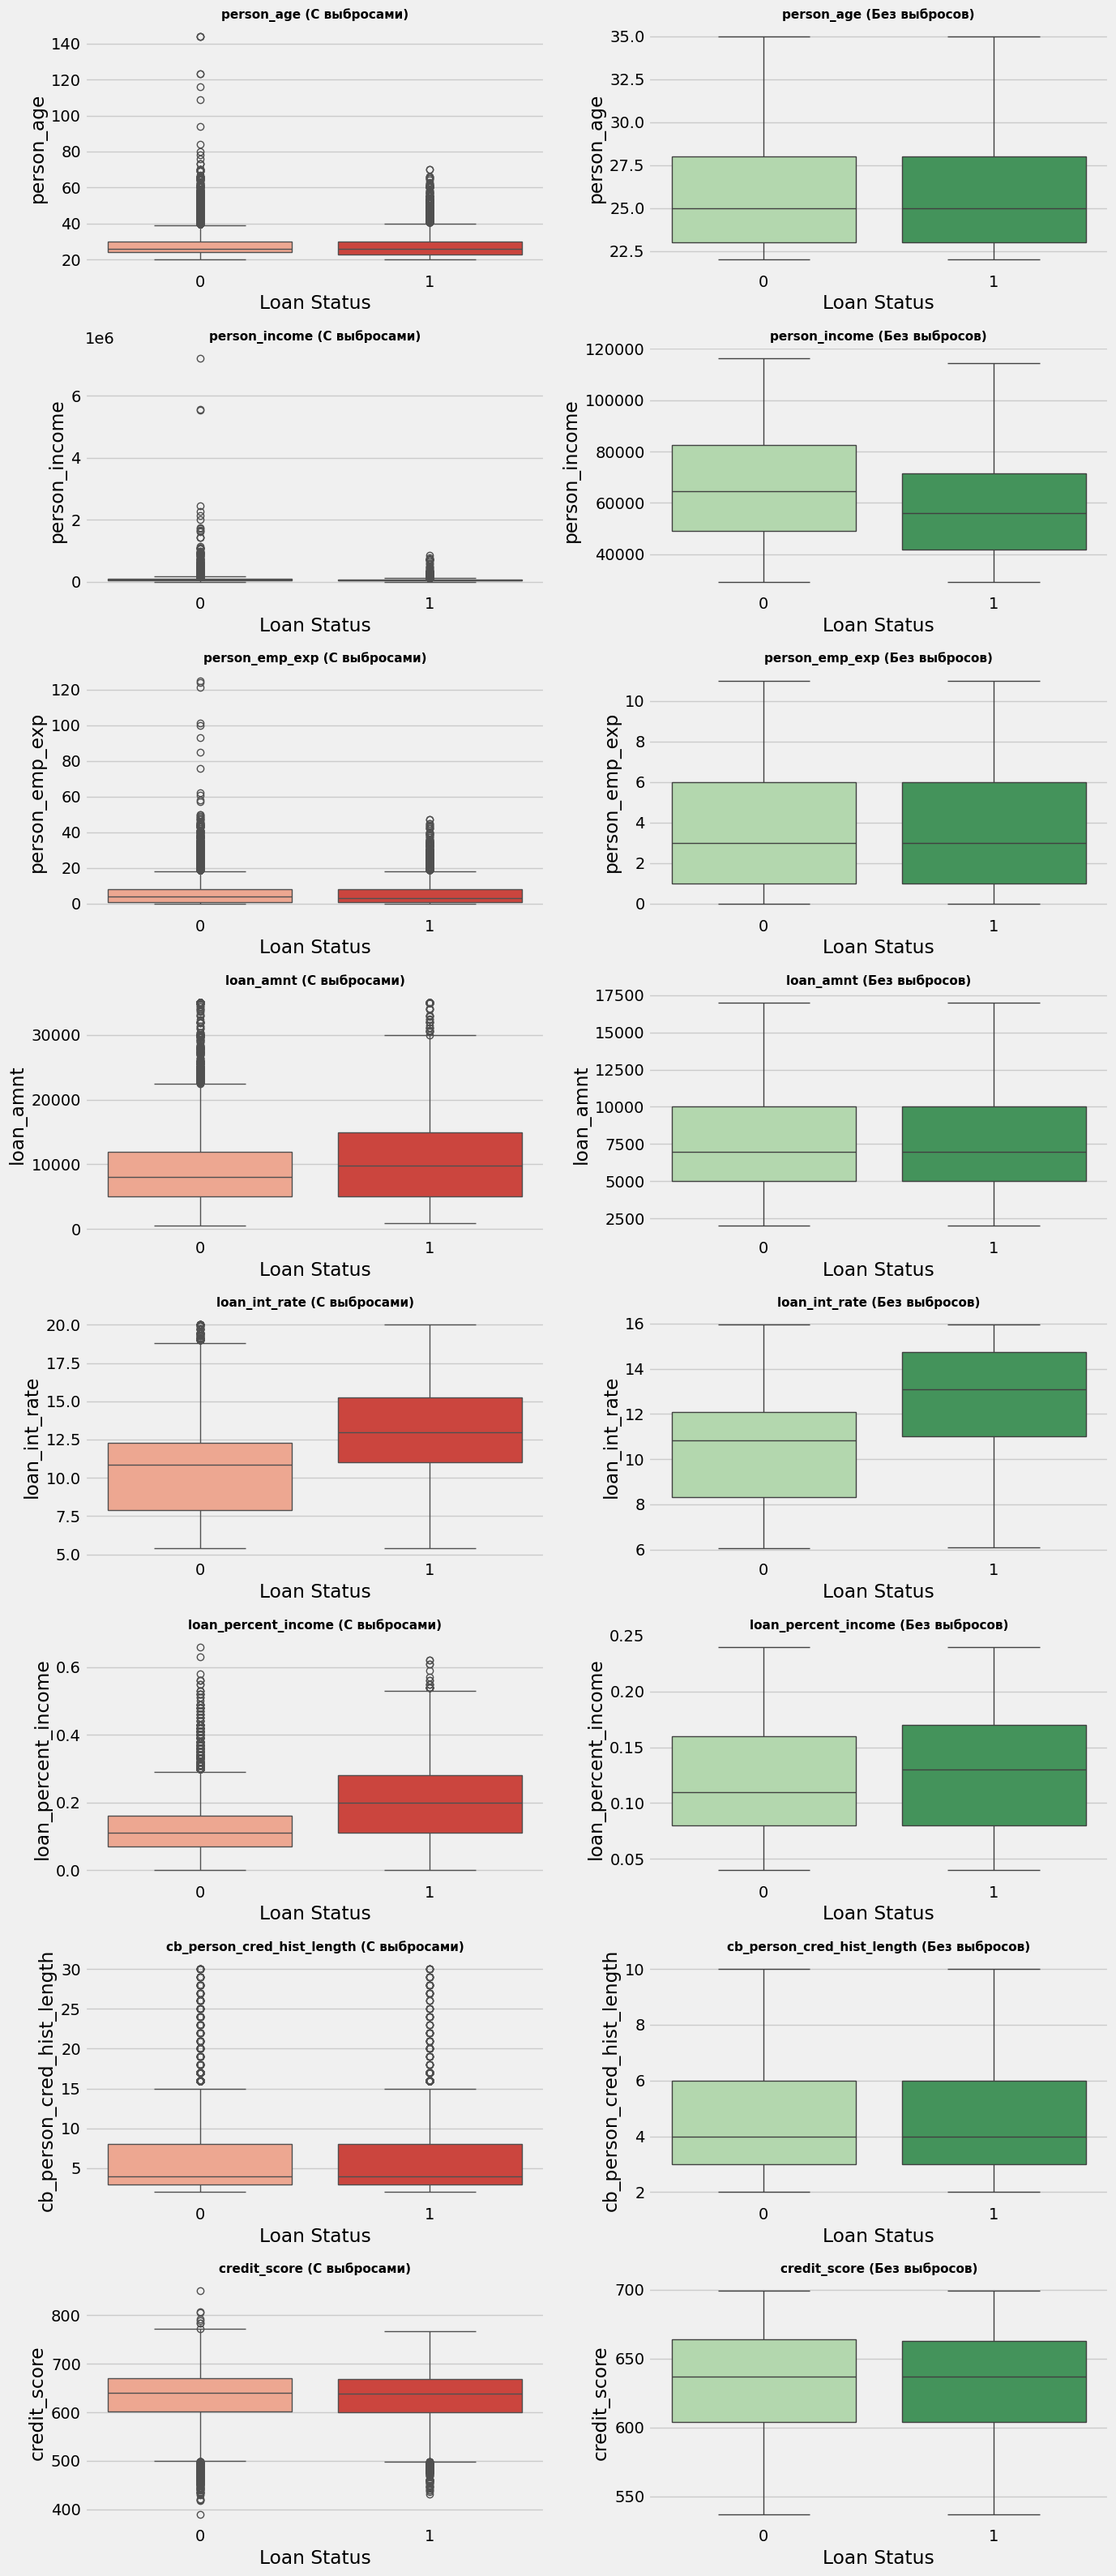

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                  'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
                  'credit_score']

# Индивидуальные настройки перцентилей для каждой колонки
percentile_settings = {
    'person_age': (0.05, 0.90),
    'person_income': (0.05, 0.85),          # Более агрессивно сверху
    'person_emp_exp': (0.05, 0.95),
    'loan_amnt': (0.05, 0.90),
    'loan_int_rate': (0.05, 0.95),
    'loan_percent_income': (0.05, 0.90),    # Более агрессивно сверху
    'cb_person_cred_hist_length': (0.05, 0.95),
    'credit_score': (0.05, 0.95)
}

# Функция с индивидуальными перцентилями
def remove_outliers_custom(data, settings):
    df_clean = data.copy()
    for col, (lower, upper) in settings.items():
        lower_bound = df_clean[col].quantile(lower)
        upper_bound = df_clean[col].quantile(upper)
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_clean = remove_outliers_custom(df, percentile_settings)

print(f"До удаления выбросов: {len(df)} строк")
print(f"После удаления выбросов: {len(df_clean)} строк")
print(f"Удалено: {len(df) - len(df_clean)} строк ({((len(df) - len(df_clean)) / len(df) * 100):.2f}%)")

# Сравнительные графики
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(14, 32))

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='loan_status', y=col, ax=axes[i, 0], palette='Reds')
    axes[i, 0].set_title(f'{col} (С выбросами)', fontsize=11, fontweight='bold')
    axes[i, 0].set_xlabel('Loan Status')
    
    sns.boxplot(data=df_clean, x='loan_status', y=col, ax=axes[i, 1], palette='Greens')
    axes[i, 1].set_title(f'{col} (Без выбросов)', fontsize=11, fontweight='bold')
    axes[i, 1].set_xlabel('Loan Status')

plt.tight_layout()
plt.show()

До удаления выбросов: 45000 строк
После удаления выбросов: 18642 строк
Удалено: 26358 строк (58.57%)

Выбросы составляют огромную часть датасета, их надо обязательно учитывать, можно в некоторых значениях будет удалить аномальные значения или пару максимальных абсолютных значений из обучающей выборки.

Посмотрим корреляции признаков.

In [54]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
print(corr_matrix.round(3).to_string())

                            person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status
person_age                       1.000          0.194           0.954      0.051          0.013               -0.043                       0.862         0.178       -0.021
person_income                    0.194          1.000           0.186      0.242          0.002               -0.234                       0.124         0.036       -0.136
person_emp_exp                   0.954          0.186           1.000      0.045          0.017               -0.040                       0.824         0.186       -0.020
loan_amnt                        0.051          0.242           0.045      1.000          0.146                0.593                       0.043         0.009        0.108
loan_int_rate                    0.013          0.002           0.017      0.146          1.000                0.125                       0

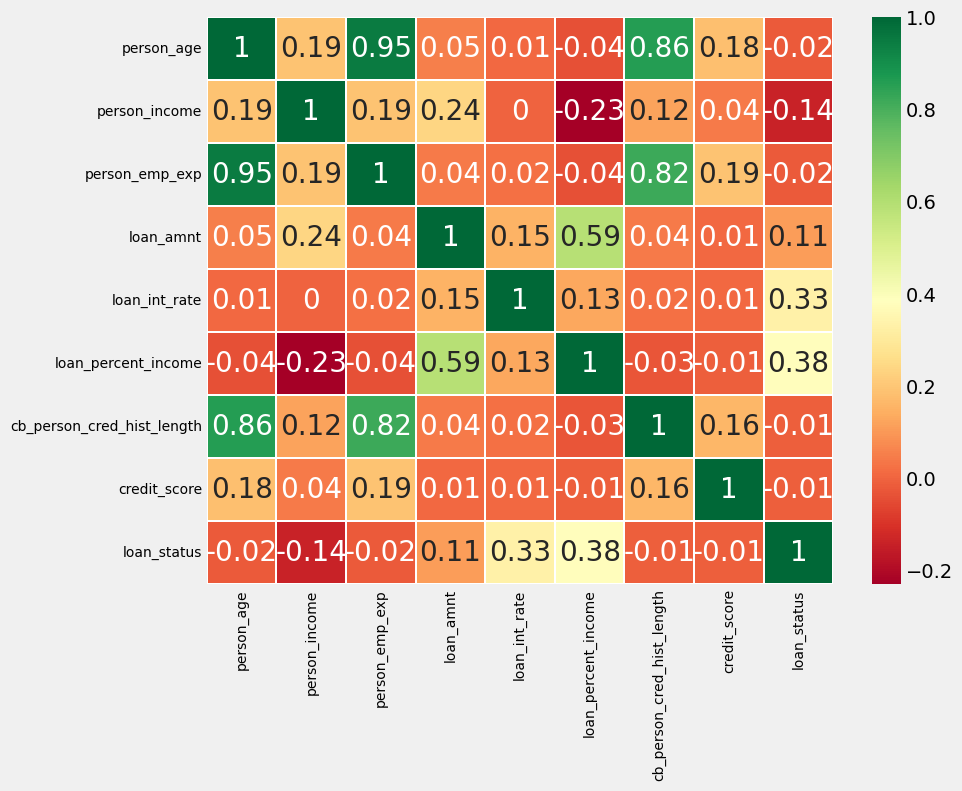

In [55]:
sns.heatmap(numeric_df.corr().round(2), annot=True, cmap='RdYlGn', linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(9,7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

На наш таргет `loan_status` положительно влияют `loan_int_rate` и `loan_percent_income` - то есть ставка и сумма заёма (в процентах от годового дохода заёмщика).
Немного отрицательно влияет `person_income`. Слабо положительно влияет `loan_amnt`.

Если брать корреляцию фичей, то стоит отметить:
`cb_person_cred_hist_length` (годы кредитной истории) и `person_emp_exp` (рабочий стаж).
`person_age` с`cb_person_cred_hist_length` и `person_emp_exp`.
Слабая корреляция `person_age`и таргет `loan_status`.

Ожидаемо коллинеарны размер и процент размера кредита `loan_amnt` от годового дохода `loan_percent_income`

Отрицательно слабо влияет `person_income` на таргет `loan_status`

`person_income` положительно коррелирует с `loan_amnt`, больше получаешь - больший заем запрашиваешь.

`person_income` отрицательно коррелирует с `loan_percent_income`, больше получаешь - меньший заем запрашиваешь, видимо есть сбережения.

`loan_amnt` положительно коррелирует с `loan_int_rate`. чем больше размер ипотеки, тем выше ставка. видимо банк снижает риск невыплат для бОльших займов более высокой ставкой.

---

На `credis_score` положительно влияют пололожительно `person_emp_exp` (стаж) , `person_age` , `cb_person_cred_hist_length` (годы кредитной истории) и слабо `person_income`.

In [60]:
df.groupby('credit_score').count()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,previous_loan_defaults_on_file,loan_status
credit_score,,,,,,,,,,,,,
390,1,1,1,1,1,1,1,1,1,1,1,1,1
418,1,1,1,1,1,1,1,1,1,1,1,1,1
419,1,1,1,1,1,1,1,1,1,1,1,1,1
420,1,1,1,1,1,1,1,1,1,1,1,1,1
421,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1,1,1,1,1,1,1,1,1,1,1,1,1
792,1,1,1,1,1,1,1,1,1,1,1,1,1
805,1,1,1,1,1,1,1,1,1,1,1,1,1


In [64]:
df.groupby('loan_status').mean(numeric_only=True)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
loan_status,,,,,,,,
0,27.833571,86157.040743,5.476714,9219.576914,10.477981,0.121783,5.898286,632.814914
1,27.521300,59886.096900,5.178000,10855.689800,12.856794,0.202521,5.759700,631.887200


In [66]:
df.groupby('loan_status').median(numeric_only=True) # медиана устойчива к выбросам, а мы помним у нас их большая часть датасета

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
loan_status,,,,,,,,
0,26.0,72928.0,4.0,8000.0,10.85,0.11,4.0,640.0
1,26.0,50629.0,3.0,9750.0,12.98,0.20,4.0,639.0


Судя по медианным значениям, очень интересно, что меньший доход с меньшим стажем, но с бОльшим размером тела кредита и ставкой скорее получит ипотеку, чем с бОльшим доходом, меньшим телом кредита и меньшей ставкой, и все это при одинаковом возрасте.

In [78]:
df.groupby('person_income').median(numeric_only=True) # по этой выборке следует чем ниже доход, тем вероятней выдача займа, наверно это просто такой случайный вывод.

,person_age,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_income,,,,,,,,
8000.0,25.0,5.0,1400.0,12.73,0.18,4.0,632.0,1.0
8037.0,29.0,10.0,3250.0,8.59,0.40,9.0,621.0,1.0
8104.0,37.0,16.0,1300.0,6.03,0.16,11.0,561.0,1.0
8186.0,21.0,0.0,1600.0,14.61,0.20,3.0,495.0,1.0
8248.0,29.0,8.0,3057.0,9.29,0.37,9.0,712.0,1.0
...,...,...,...,...,...,...,...,...
2280980.0,60.0,37.0,1500.0,11.01,0.00,21.0,682.0,0.0
2448661.0,42.0,16.0,8450.0,12.29,0.00,15.0,635.0,0.0
5545545.0,116.0,93.0,3823.0,12.15,0.00,24.0,708.0,0.0


In [76]:
df.groupby('loan_percent_income').median(numeric_only=True) # чем выше процент займа к годовому доходу - тем вероятней выдача.

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,cb_person_cred_hist_length,credit_score,loan_status
loan_percent_income,,,,,,,,
0.00,41.0,994533.0,19.0,3823.0,11.01,14.0,637.0,0.0
0.01,28.0,121164.0,5.0,1500.0,10.26,6.0,645.0,0.0
0.02,26.0,90672.5,4.0,1997.0,11.00,4.0,642.0,0.0
0.03,27.0,88320.5,5.0,2616.5,10.99,5.0,640.0,0.0
0.04,27.0,85340.5,4.0,3500.0,10.96,5.0,641.0,0.0
...,...,...,...,...,...,...,...,...
0.59,23.0,23561.0,1.0,13897.0,8.67,3.0,671.0,1.0
0.61,26.5,19904.0,5.0,12162.5,9.01,4.0,610.5,1.0
0.62,28.0,35824.5,6.0,22150.0,10.44,3.5,661.5,1.0


In [75]:
df.groupby('loan_int_rate').median(numeric_only=True) # чем выше ставка, тем вероятней выдача займа

,person_age,person_income,person_emp_exp,loan_amnt,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
loan_int_rate,,,,,,,,
5.42,26.0,69293.5,3.0,6000.0,0.080,4.0,635.0,0.0
5.43,36.0,41514.5,12.5,4800.0,0.120,9.0,666.5,0.0
5.44,24.5,97023.0,3.5,7500.0,0.085,3.0,681.5,0.0
5.46,24.0,53569.0,0.0,10798.0,0.200,4.0,674.0,0.0
5.47,28.0,60963.0,6.0,6000.0,0.080,8.0,673.0,0.0
...,...,...,...,...,...,...,...,...
19.80,31.0,100407.0,9.0,17783.0,0.180,8.0,655.0,1.0
19.82,23.0,46461.0,0.0,15000.0,0.260,3.0,666.0,1.0
19.90,24.0,54191.0,0.0,15770.0,0.290,4.0,557.0,1.0


In [70]:
df.groupby('credit_score').median(numeric_only=True)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
credit_score,,,,,,,,
390,28.0,36977.0,4.0,3000.0,7.29,0.08,7.0,0.0
418,23.0,73126.0,0.0,20000.0,7.85,0.27,3.0,0.0
419,26.0,26606.0,1.0,1580.0,11.03,0.06,7.0,0.0
420,29.0,102856.0,5.0,8469.0,11.32,0.08,6.0,0.0
421,23.0,25292.0,0.0,4000.0,12.23,0.16,2.0,0.0
...,...,...,...,...,...,...,...,...
789,144.0,300616.0,125.0,4800.0,13.57,0.02,3.0,0.0
792,109.0,5556399.0,85.0,6195.0,12.58,0.00,22.0,0.0
805,123.0,97140.0,101.0,20400.0,10.25,0.21,3.0,0.0


Не очень понятна зависимость `credit_score` и `loan_status`

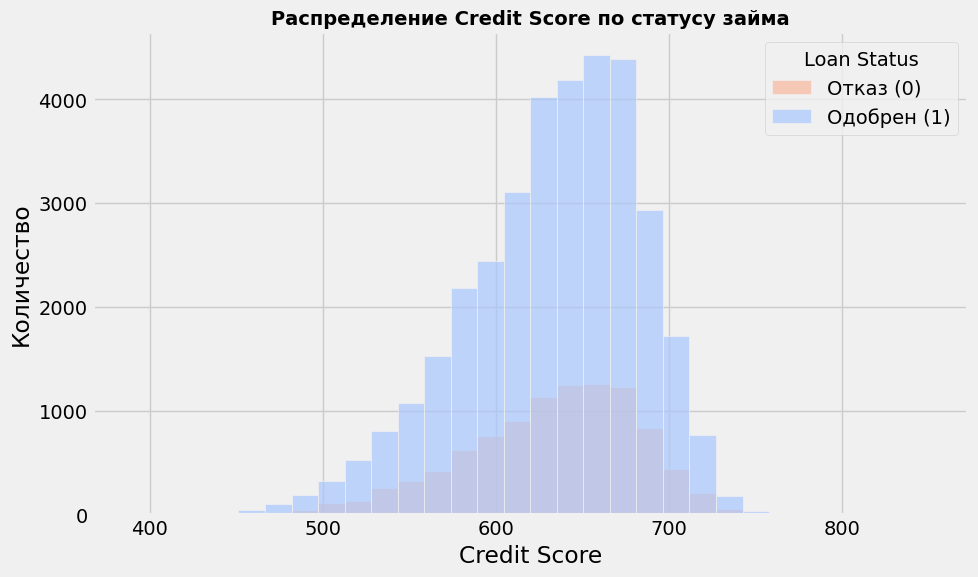

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='credit_score', hue='loan_status', bins=30, palette='coolwarm', alpha=0.7)
plt.title('Распределение Credit Score по статусу займа', fontsize=14, fontweight='bold')
plt.xlabel('Credit Score')
plt.ylabel('Количество')
plt.legend(title='Loan Status', labels=['Отказ (0)', 'Одобрен (1)'])
plt.tight_layout()
plt.show()


In [94]:
# Проверяем график
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [96]:
df.groupby('loan_status')['credit_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,35000.0,632.814914,50.475294,390.0,602.0,640.0,670.0,850.0
1,10000.0,631.887200,50.293485,431.0,601.0,639.0,669.0,767.0


Получается, что кредитный скоринг не основной параметр, по которому принимается решение.

In [97]:
correlations = df.select_dtypes(include=['number']).corr()['loan_status'].sort_values(ascending=False)
print(correlations)

loan_status                   1.000000
loan_percent_income           0.384880
loan_int_rate                 0.332005
loan_amnt                     0.107714
credit_score                 -0.007647
cb_person_cred_hist_length   -0.014851
person_emp_exp               -0.020481
person_age                   -0.021476
person_income                -0.135808
Name: loan_status, dtype: float64


Посмотрим на категориальные признаки!

In [107]:
df.head() # вспомним фичи датасета

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [112]:
df.isnull().sum() # проверка пустых значений в данных

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [110]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist() # категориальные признаки
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [154]:
for col in cat_cols:
    print(f"{col}: {len(df[col].dropna().unique())}")
    print(f" {sorted(df[col].dropna().unique())}")
    print()

person_gender: 2
 ['female', 'male']

person_education: 5
 ['Associate', 'Bachelor', 'Doctorate', 'High School', 'Master']

person_home_ownership: 4
 ['MORTGAGE', 'OTHER', 'OWN', 'RENT']

loan_intent: 6
 ['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE']

previous_loan_defaults_on_file: 2
 ['No', 'Yes']



In [201]:
person_gender_map = {
    'male': 1,
    'female': 2
}

person_education_map = {
    'Associate': 1,
    'Bachelor': 2,
    'Doctorate': 3,
    'High School': 4,
    'Master': 5
}

person_home_ownership_map = {
    'MORTGAGE': 0,
    'OTHER': 1,
    'OWN': 2,
    'RENT': 3
}

loan_intent_map = {
    'DEBTCONSOLIDATION': 1,
    'EDUCATION': 2,
    'HOMEIMPROVEMENT': 3,
    'MEDICAL': 4,
    'PERSONAL': 5,
    'VENTURE': 6
}

previous_loan_defaults_on_file_map = {
    'Yes': 0,
    'No': 1
}

# кодируем пропуски как -1 (просто чтобы не забывать в будущем)

df['person_gender_encoded'] = df['person_gender'].map(person_gender_map).fillna(-1).astype(int)
df['person_education_encoded'] = df['person_education'].map(person_education_map).fillna(-1).astype(int)
df['person_home_ownership_encoded'] = df['person_home_ownership'].map(person_home_ownership_map).fillna(-1).astype(int)
df['loan_intent_encoded'] = df['loan_intent'].map(loan_intent_map).fillna(-1).astype(int)
df['previous_loan_defaults_on_file_encoded'] = df['previous_loan_defaults_on_file'].map(previous_loan_defaults_on_file_map).fillna(-1).astype(int)

In [156]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
print(corr_matrix.round(2).to_string()) # округлим для простоты

                                        person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  person_gender_encoded  person_education_encoded  person_home_ownership_encoded  loan_intent_encoded  previous_loan_defaults_on_file_encoded
person_age                                    1.00           0.19            0.95       0.05           0.01                -0.04                        0.86          0.18        -0.02                  -0.02                     -0.01                          -0.04                 0.03                                    0.03
person_income                                 0.19           1.00            0.19       0.24           0.00                -0.23                        0.12          0.04        -0.14                  -0.01                      0.00                          -0.22                 0.01                                   -0.06
person_emp_exp           

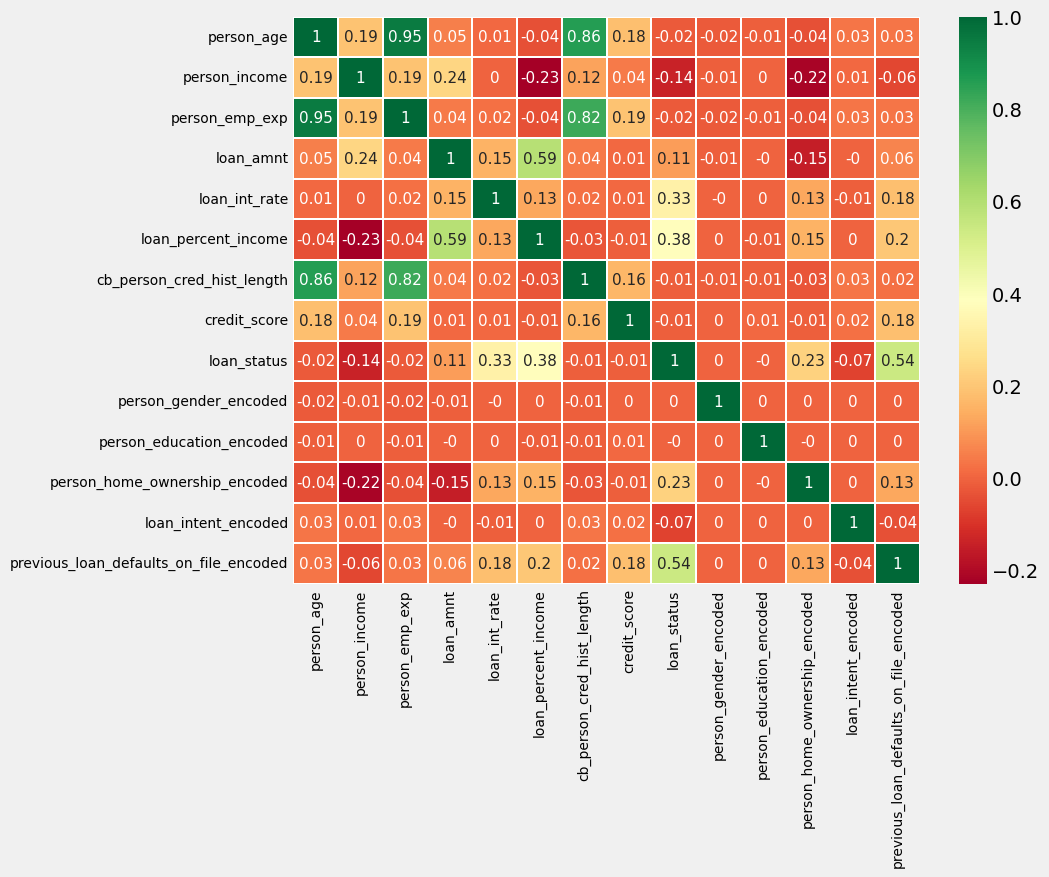

In [157]:
sns.heatmap(numeric_df.corr().round(2), annot=True, cmap='RdYlGn', linewidths=0.2,annot_kws={'size':11})
fig=plt.gcf()
fig.set_size_inches(9,7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

На `loan_status` больше всего положительно влияет `previous_loan_defaults_on_file` и немного меньше `person_home_ownership`

In [166]:
# Распределение loan_status по defaults
print(pd.crosstab(df['previous_loan_defaults_on_file'], df['loan_status']))


loan_status                         0      1
previous_loan_defaults_on_file              
No                              12142  10000
Yes                             22858      0


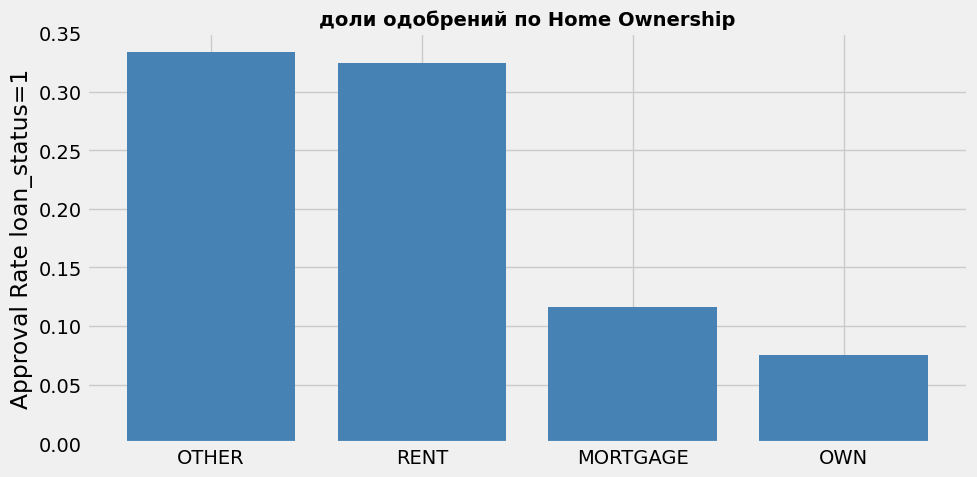

In [165]:
approval_by_home = df.groupby('person_home_ownership')['loan_status'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
bars = plt.bar(approval_by_home.index, approval_by_home.values, color='steelblue')

plt.title('доли одобрений по Home Ownership', fontweight='bold', fontsize=14)
plt.ylabel('Approval Rate loan_status=1')
plt.xlabel('')

plt.tight_layout()
plt.show()


In [145]:
# Сколько записей в каждой категории?
print("=== Количество по категориям ===")
print(df['person_home_ownership'].value_counts())

print("\n=== Детальная таблица ===")
print(pd.crosstab(df['person_home_ownership'], df['loan_status'], margins=True))

print("\n=== Средний доход по категориям ===")
print(df.groupby('person_home_ownership')['person_income'].mean().sort_values(ascending=False))


=== Количество по категориям ===
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

=== Детальная таблица ===
loan_status                0      1    All
person_home_ownership                     
MORTGAGE               16345   2144  18489
OTHER                     78     39    117
OWN                     2729    222   2951
RENT                   15848   7595  23443
All                    35000  10000  45000

=== Средний доход по категориям ===
person_home_ownership
MORTGAGE    101569.307751
OTHER        91480.068376
OWN          68423.409353
RENT         65001.143838
Name: person_income, dtype: float64


In [146]:
# Проверим связь с дефолтами
print(pd.crosstab(df['person_home_ownership'], df['previous_loan_defaults_on_file'], normalize='index') * 100)


previous_loan_defaults_on_file         No        Yes
person_home_ownership                               
MORTGAGE                        42.333279  57.666721
OTHER                           59.829060  40.170940
OWN                             39.173162  60.826838
RENT                            55.833298  44.166702


In [191]:
df.select_dtypes(include=['number']).head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_encoded,person_education_encoded,person_home_ownership_encoded,loan_intent_encoded,previous_loan_defaults_on_file_encoded
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,2,5,3,5,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,2,4,2,2,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,2,4,0,4,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,2,2,3,4,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,1,5,3,4,1


In [192]:
df[df['person_age'] < 100].max()

person_age                                     94.0
person_gender                                  male
person_education                             Master
person_income                             2448661.0
person_emp_exp                                   76
person_home_ownership                          RENT
loan_amnt                                   35000.0
loan_intent                                 VENTURE
loan_int_rate                                  20.0
loan_percent_income                            0.66
cb_person_cred_hist_length                     30.0
credit_score                                    784
previous_loan_defaults_on_file                  Yes
loan_status                                       1
person_gender_encoded                             2
person_education_encoded                          5
person_home_ownership_encoded                     3
loan_intent_encoded                               6
previous_loan_defaults_on_file_encoded            1
dtype: objec

In [254]:
# Prepare dataframe
df_clean = df[df['person_age'] < 100]

# Features и Target
X = df_clean.drop('loan_status', axis=1).select_dtypes(include=['number']) # data leak prevention
y = df_clean['loan_status']

# Classic train/test/split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Нормализация
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [255]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,person_age,[0.21558931097465983]
1,person_income,[0.18418532449587452]
2,person_emp_exp,[-0.1637201695428266]
3,loan_amnt,[-0.6510165303170625]
4,loan_int_rate,[0.965975968541538]
5,loan_percent_income,[1.3574323162220776]
6,cb_person_cred_hist_length,[-0.024437510923394416]
7,credit_score,[-0.4480378275630775]
8,person_gender_encoded,[-0.016327058512396457]
9,person_education_encoded,[-0.0035434938528014727]


`previous_loan_defaults_on_file_encoded`: 4.514

Наличие дефолтов в истории - сильнейший признак!

`loan_percent_income`: 1.357

Доля кредита в доходе - очень важный признак.

`loan_int_rate`: 0.966

Процентная ставка по кредиту тоже влияет.

`person_home_ownership_encoded`: 0.361

Тип жилья тоже имеет значение.

Accuracy: 0.8938
F1 Score: 0.7539
ROC-AUC: 0.9515


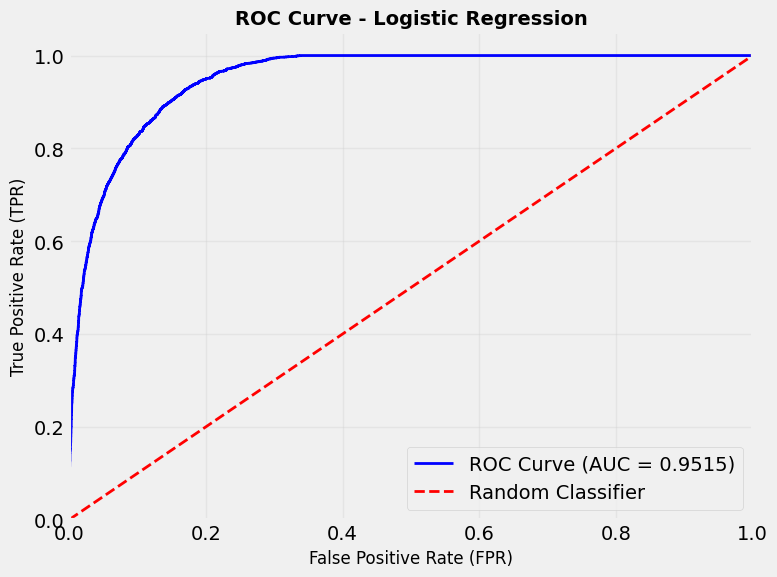


=== Confusion Matrix ===
[[9867  623]
 [ 811 2197]]


In [256]:
# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# F1
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# ROC-AUC
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

In [257]:
predicted = model.predict(X_test)
ones = sum(predicted)
zeros = len(predicted) - ones

print(f"0: {zeros}")
print(f"1: {ones}")

0: 1145
1: 12353


In [258]:
probs = model.predict_proba(X_test)
print(probs)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [264]:
from sklearn.pipeline import Pipeline
# нормализация для обучения с кросс-валидацией
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

[0.89377778 0.87511111 0.90022222 0.88953101 0.87019338 0.88619693
 0.88508557 0.90331185 0.89797733 0.90042232]
0.8901829492973746

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     10490
           1       0.78      0.73      0.75      3008

    accuracy                           0.89     13498
   macro avg       0.85      0.84      0.84     13498
weighted avg       0.89      0.89      0.89     13498

